In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings

ruta_reviews_california = "C:\\Users\\licle\\Desktop\\PF\\DATASET-PARQUET\\combined_reviews_california.parquet"


In [3]:
reviews_california = pd.read_parquet(ruta_reviews_california)

In [4]:
reviews_california.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,108991152262655788985,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,111290322219796215751,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,112640357449611959087,David Han,1583643882296,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,117440349723823658676,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,100580770836123539210,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49


In [5]:
#Tipos de datos
reviews_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 164.8+ MB


In [6]:
#¿Hay valores nulos?
reviews_california.isnull().sum()

user_id          0
name             0
time             0
rating           0
text       1170964
pics       2600710
resp       2454831
gmap_id          0
dtype: int64

In [7]:
#¿Se repiten los usuarios?
reviews_california.name.value_counts()

name
A Google User       1532
David                460
Jose Hernandez       412
Jose Gonzalez        369
Jose Garcia          364
                    ... 
Markkis Sonier         1
Kenyatta C. Moon       1
LUCIO ARRIAGA          1
robert ravishing       1
Natalia Hughes         1
Name: count, Length: 813119, dtype: int64

In [8]:
reviews_california.user_id.value_counts()

user_id
103388545662911134707    313
107774045688237188169    144
103018272043208039402    131
111937447827665620879    131
115027286096822577705    129
                        ... 
116785599446084072805      1
115604798449883197219      1
107910635629804027799      1
100626088384715872764      1
103459689924757266638      1
Name: count, Length: 973518, dtype: int64

In [12]:
user_id_max = reviews_california.loc[reviews_california['user_id'] == '103388545662911134707']
user_id_max.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
1493,103388545662911134707,"franchesca “California,Lakerz” lucas",1484853689273,5,None,None,None,0x80d9580092e4601b:0x65bd8cc20cec622f
4421,103388545662911134707,"franchesca “California,Lakerz” lucas",1482455689989,5,None,None,None,0x80952621cd6e243d:0x3c44b35e511442f6
4932,103388545662911134707,"franchesca “California,Lakerz” lucas",1474938962847,5,None,None,None,0x80dc7101e45d43d1:0x10beb92b4b8bb483
5832,103388545662911134707,"franchesca “California,Lakerz” lucas",1483798658633,5,None,None,None,0x808f874d34d2cf77:0xd5499649381604eb
10270,103388545662911134707,"franchesca “California,Lakerz” lucas",1483835593009,5,None,None,None,0x80853d514efd95fd:0x3d37fa313e73df28


In [14]:
name_max = reviews_california.loc[reviews_california['name'] == 'A Google User']
name_max.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
1907,117922984047079175233,A Google User,1488562982342,5,I am rating 5,None,None,0x80c290b97496c55d:0xe2679b88deeef74f
8526,116640942363149926195,A Google User,1382552839676,5,"I was so worried about getting my car fixed, I...",None,None,0x80dcd765bf17e031:0x5d1313cc9c8e926e
8527,104839411073604545916,A Google User,1380557620687,5,Everything was very good. Thank you for everyt...,None,None,0x80dcd765bf17e031:0x5d1313cc9c8e926e
8528,104839411073604545916,A Google User,1380557620687,5,Everything was very good. Thank you for everyt...,None,None,0x80dcd765bf17e031:0x5d1313cc9c8e926e
8535,111036274996959923675,A Google User,1511218017440,5,Things are going well between Steve and me. Th...,None,None,0x808580d07e3d408b:0x570ea6423d18c0f9


Gente que no tiene nombre de usuario

In [15]:
name_max2 = reviews_california.loc[reviews_california['name'] == 'David']
name_max2.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
7681,116092137586851619486,David,1545453752741,3,None,None,None,0x80858064552c81cb:0xdbc29cad68e3996e
8393,117344819003084822310,David,1616178944721,5,Super polite and helpful,None,None,0x80843628b7221c59:0x43c535119b372c3a
9049,103942312717992728519,David,1501309002465,3,It is a bit difficult to find in all of the of...,None,None,0x808fc9616a004d15:0x8c773d8819d93af2
11175,115333686113225422806,David,1553201118004,5,None,None,None,0x80dc7509c80ac751:0x850f47dc3fefcb00
12630,111346155342172162657,David,1565222643778,5,Caring staff and quick service,None,None,0x80c16cc6f57d7fd1:0xe2e06ecda54aebb0


Diferentes User_id para el nombre David

Borramos los valores nulos para poder trabajar con una nube de palabras en los comentarios

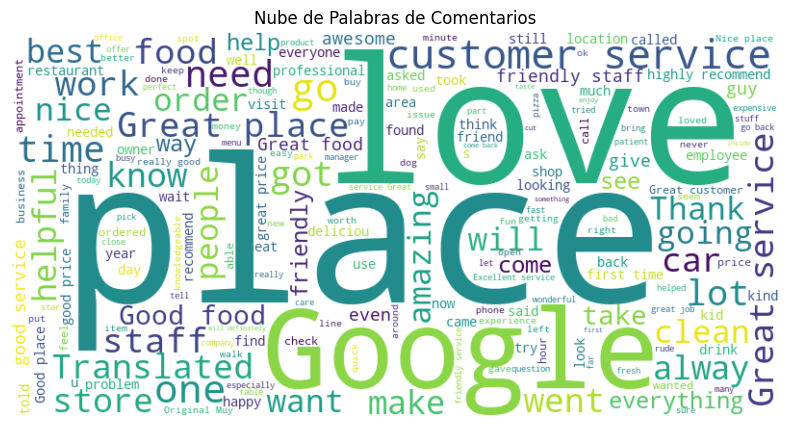

In [18]:
#Nube de Palabras con todos los comentarios

# Filtra los valores nulos en la columna 'text'
filtered_reviews = reviews_california['text'].dropna()

# Crea un solo string con todos los comentarios filtradas
all_reviews = " ".join(str(review) for review in filtered_reviews)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Comentarios')
plt.show()

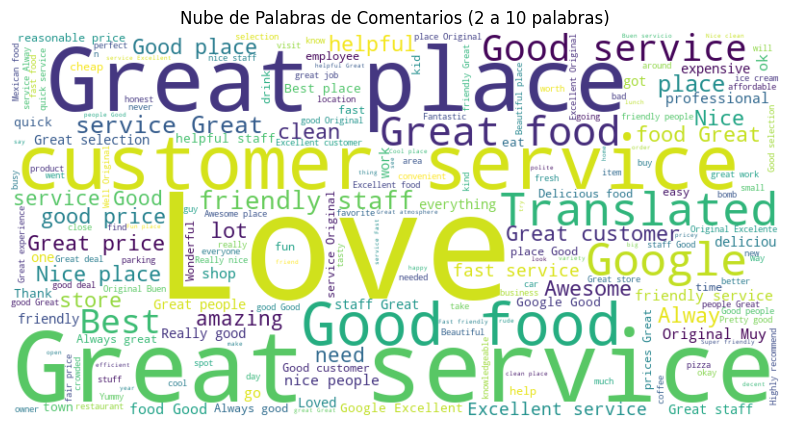

In [19]:
#Nube de Palabras de Comentarios solo con los que tengan de 2 a 10 palabras

# Filtra los Comentarios por longitud (2 a 10 palabras)
filtered_reviews = reviews_california[reviews_california['text'].apply(lambda x: isinstance(x, str) and 2 <= len(x.split()) <= 10)]['text']

# Crea un solo string con todas los Comentarios filtrados
all_reviews = " ".join(filtered_reviews.astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Comentarios (2 a 10 palabras)')
plt.show()

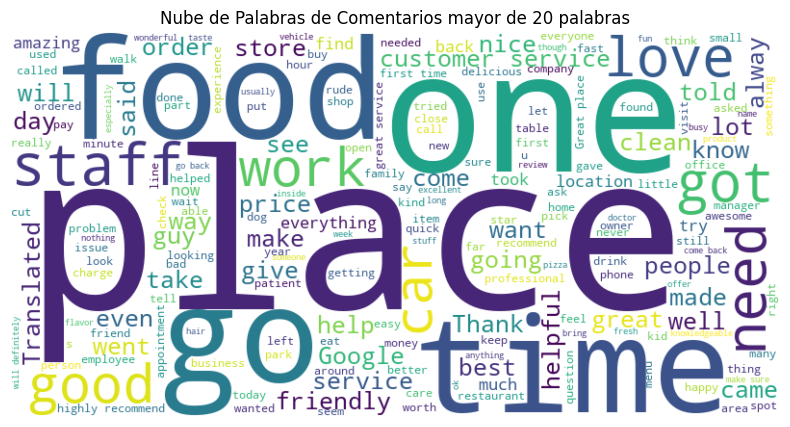

In [20]:
#Nube de Palabras de Comentarios solo con los que tengan mayor de 20 palabras

# Filtra los Comentarios por longitud mayor de 20 palabras
filtered_reviews = reviews_california[reviews_california['text'].apply(lambda x: isinstance(x, str) and len(x.split()) > 20)]['text']

# Crea un solo string con todas los Comentarios filtrados
all_reviews = " ".join(filtered_reviews.astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Comentarios mayor de 20 palabras')
plt.show()

#### Cantidad de palabras que se repiten más en comentarios:
* Love
* Place
* Google
* Customer Service
* Great Service
* Great Place
* Staff
* Good Food
#### 2 a 10 Palabrás que más se repiten en comentarios:
* Love
* Great Service
* Customer Service
* Great Place
* Good food
* Traslated
* Great Food
* Great Service
#### Más de 20 palabras que más se repiten en comentarios:
* Food
* Place
* Customer Service
* Time
* Love
* Traslated
* Need


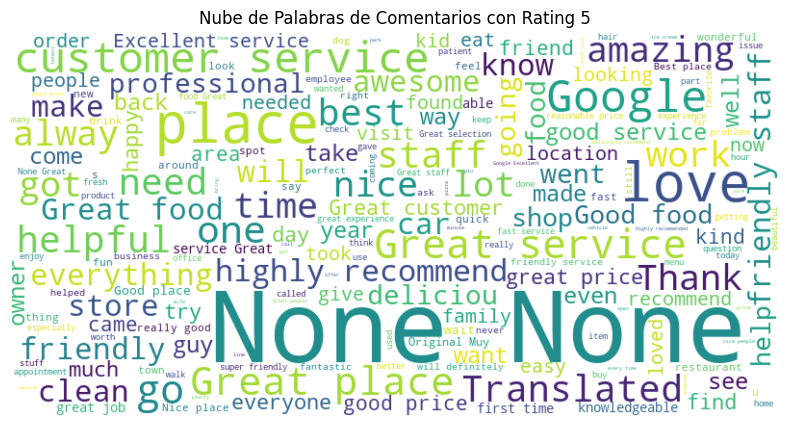

In [21]:
# Filtramos las palabras según el Rating 5 
# Nube de Palabras de Reseñas con Rating 5
# Filtra las reseñas por rating igual a 5
filtered_reviews = reviews_california[reviews_california['rating'] == 5]['text']

# Crea un solo string con todas las reseñas filtradas
all_reviews = " ".join(filtered_reviews.astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Comentarios con Rating 5')
plt.show()

#### Palabras que más se repiten en comentarios con rating 5:
* Love
* Place
* Customer Service
* Great Place

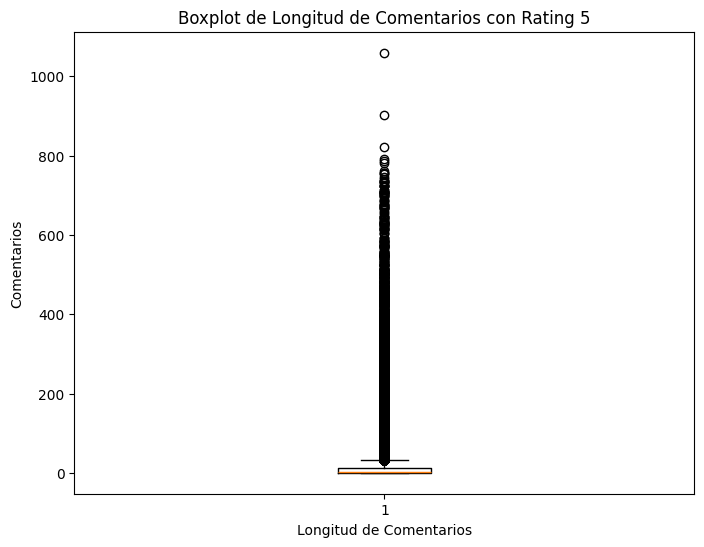

In [23]:
# Boxplot de Longitud de Comentarios con Rating 5
# Filtra los Comentarios por rating igual a 5
filtered_reviews = reviews_california[reviews_california['rating'] == 5]['text']

# Crea una lista con la longitud de las reseñas
review_lengths = filtered_reviews.apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 6))
plt.boxplot(review_lengths, vert=True, showfliers=True)
plt.title('Boxplot de Longitud de Comentarios con Rating 5')
plt.xlabel('Longitud de Comentarios')
plt.ylabel('Comentarios')
plt.show()

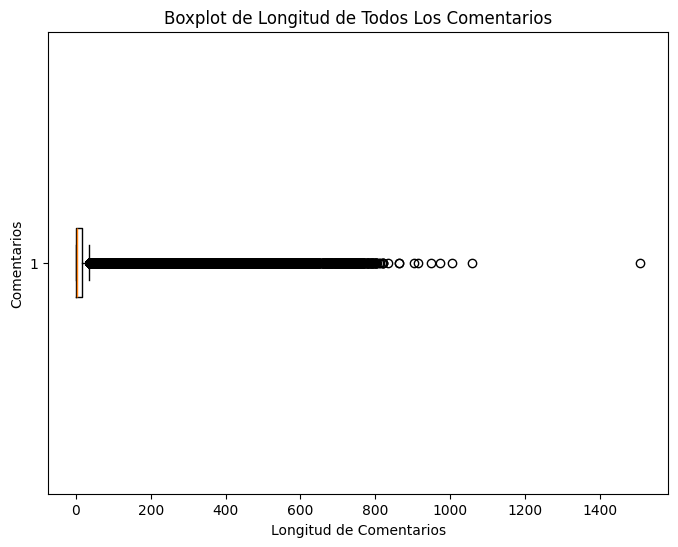

In [22]:
# Boxplot de Longitud de Todos los comentarios
# Crea una lista con la longitud de todos los Comentarios
review_lengths = reviews_california['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 6))
plt.boxplot(review_lengths, vert=False, showfliers=True)
plt.title('Boxplot de Longitud de Todos Los Comentarios')
plt.xlabel('Longitud de Comentarios')
plt.ylabel('Comentarios')
plt.show()

Los Outliers se ubican luego de una longitud mayor a 800.

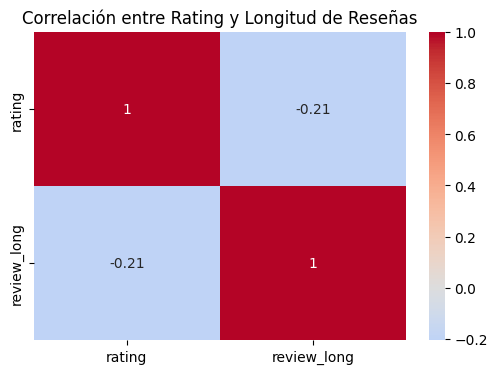

In [24]:
#Correlación entre Rating y Longitud de Comentarios

# Filtra los comentarios No Nulos
filtered_reviews = reviews_california['text'].notna()

# Calcula la longitud de los comentarios y la agrega al DataFrame
reviews_california['review_long'] = reviews_california[filtered_reviews]['text'].str.split().apply(len)

# Calcula la correlación entre el rating y la longitud de los comentarios
correlation_matrix = reviews_california[filtered_reviews][['rating', 'review_long']].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Rating y Longitud de Reseñas')
plt.show()

La correlación de la longitud de los comentarios y el rating es medianamente baja, no obstante se puede observar una débil relación entre los comentarios extensos y puntuación baja

In [8]:
# Identificamos los 20 usuarios más repetidos
usuarios_mas_repetidos = reviews_california['user_id'].value_counts().head(20).index

# Filtramos el DataFrame para incluir solo los registros de esos 20 usuarios
df_filtrado = reviews_california[reviews_california['user_id'].isin(usuarios_mas_repetidos)]

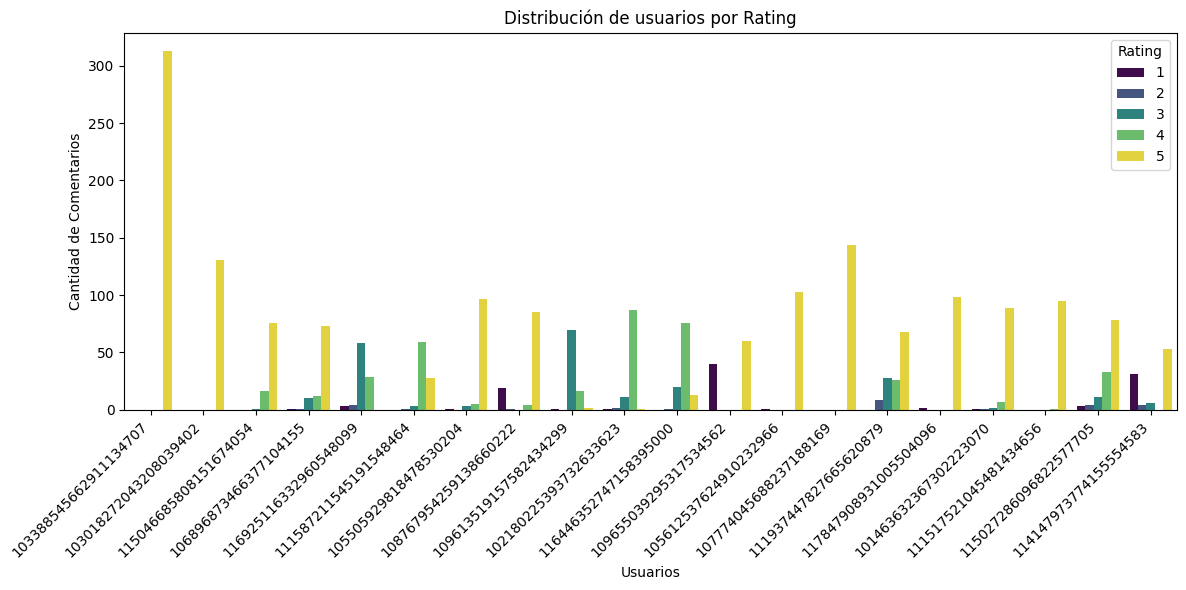

In [9]:
warnings.filterwarnings("ignore")
#Distribucion de Calificaciones por Rating
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado, x='user_id', hue='rating', palette='viridis')
plt.title('Distribución de usuarios por Rating')
plt.xlabel('Usuarios')
plt.ylabel('Cantidad de Comentarios')
plt.legend(title='Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

Mayor cantidad de comentarios positivos los usuarios de Google con más comentarios que calificaron 5 el lugar